In [5]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pnd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [21]:
arr = np.genfromtxt('data/prices.csv', delimiter=',')
xs, ys = arr[:,:2].copy()[1:], arr[:, 2:].ravel()[1:]
print("Dataset size: ", len(xs))

Dataset size:  47


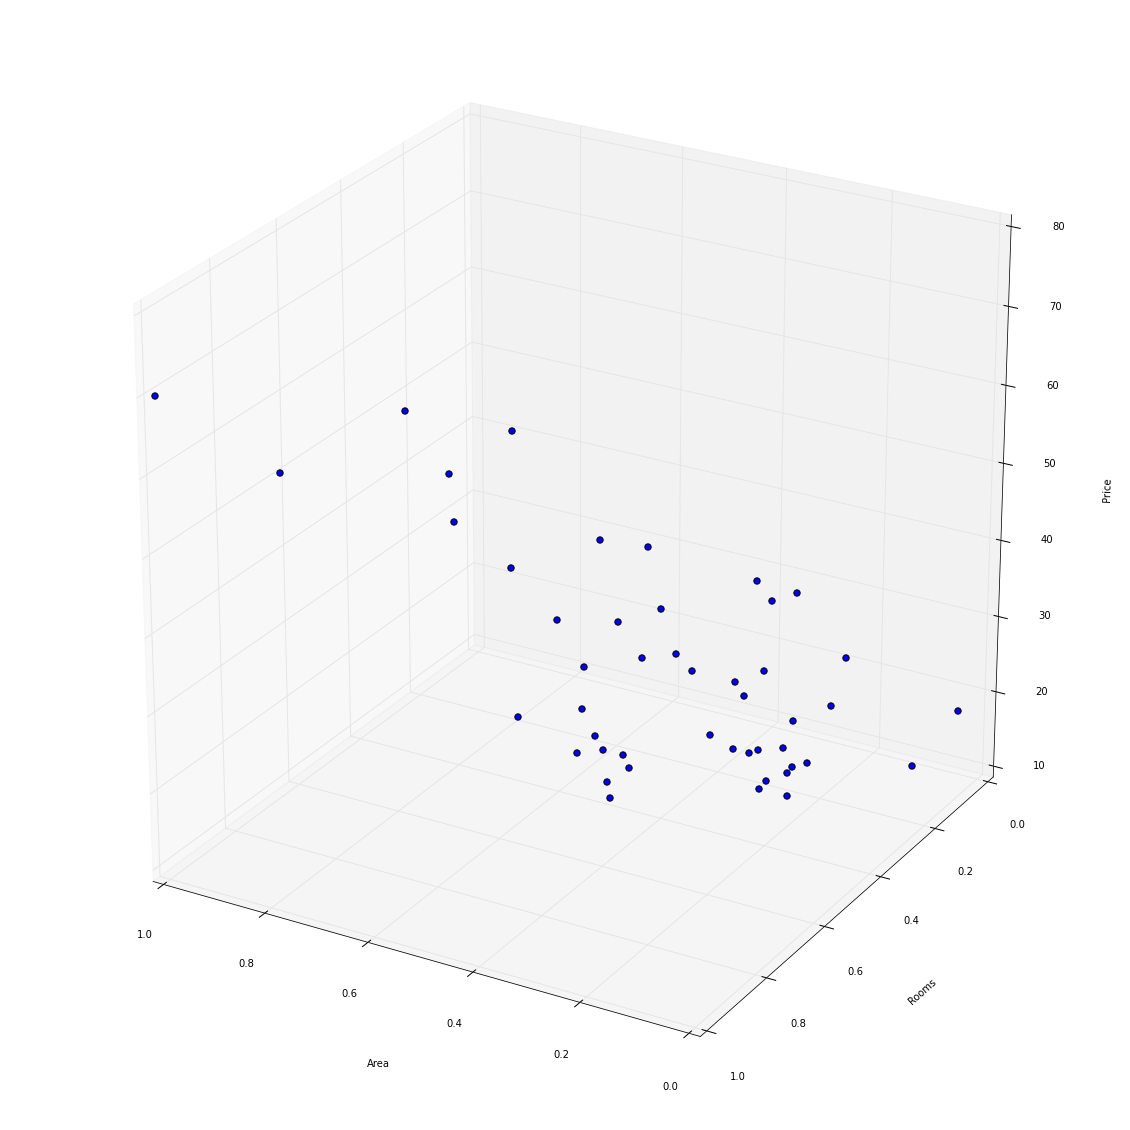

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def show(xs, ys, elev=25.0, azim=120):
    fig = plt.figure(figsize=(20, 20))
    ax = fig.gca(projection='3d')
    ax.scatter(xs[:, 0], xs[:, 1], ys, s=40, zdir='z', depthshade=False)
    
    ax.set_xlim3d(0, 1.0)
    ax.set_ylim3d(0, 1.0)

    ax.set_xlabel('Area')
    ax.set_ylabel('Rooms')
    ax.set_zlabel('Price')
    
    ax.view_init(elev=elev, azim=azim)
    #‘elev’ stores the elevation angle in the z plane. ‘azim’ stores the azimuth angle in the x,y plane.
    
    plt.show()
x_scaled = MinMaxScaler().fit_transform(xs)
y_scaled = ys / 10000
show(x_scaled, y_scaled, 25.0, 120)

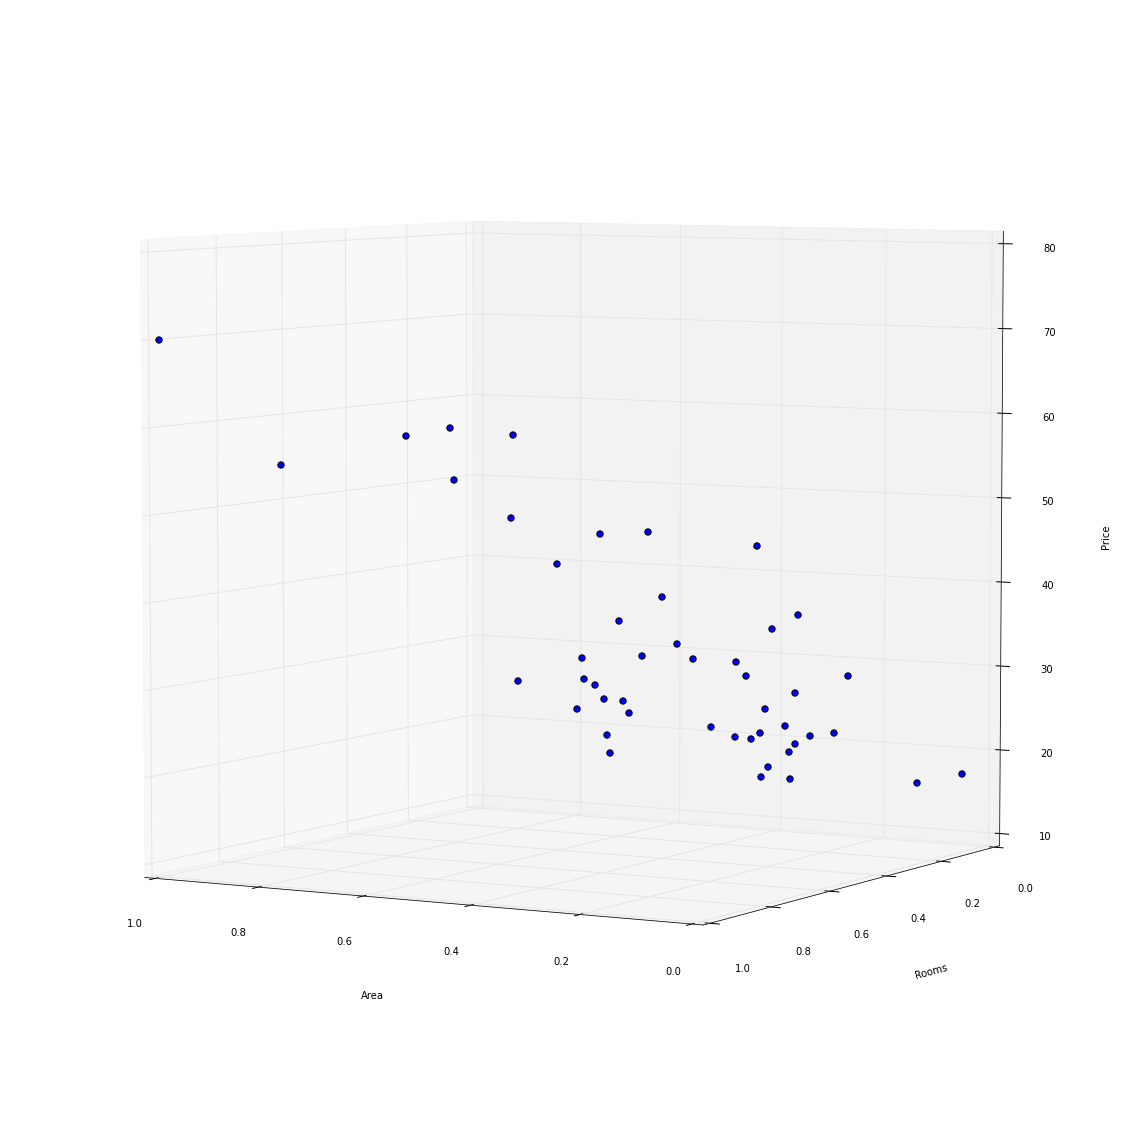

In [23]:
show(x_scaled, y_scaled, 5.0, 120)

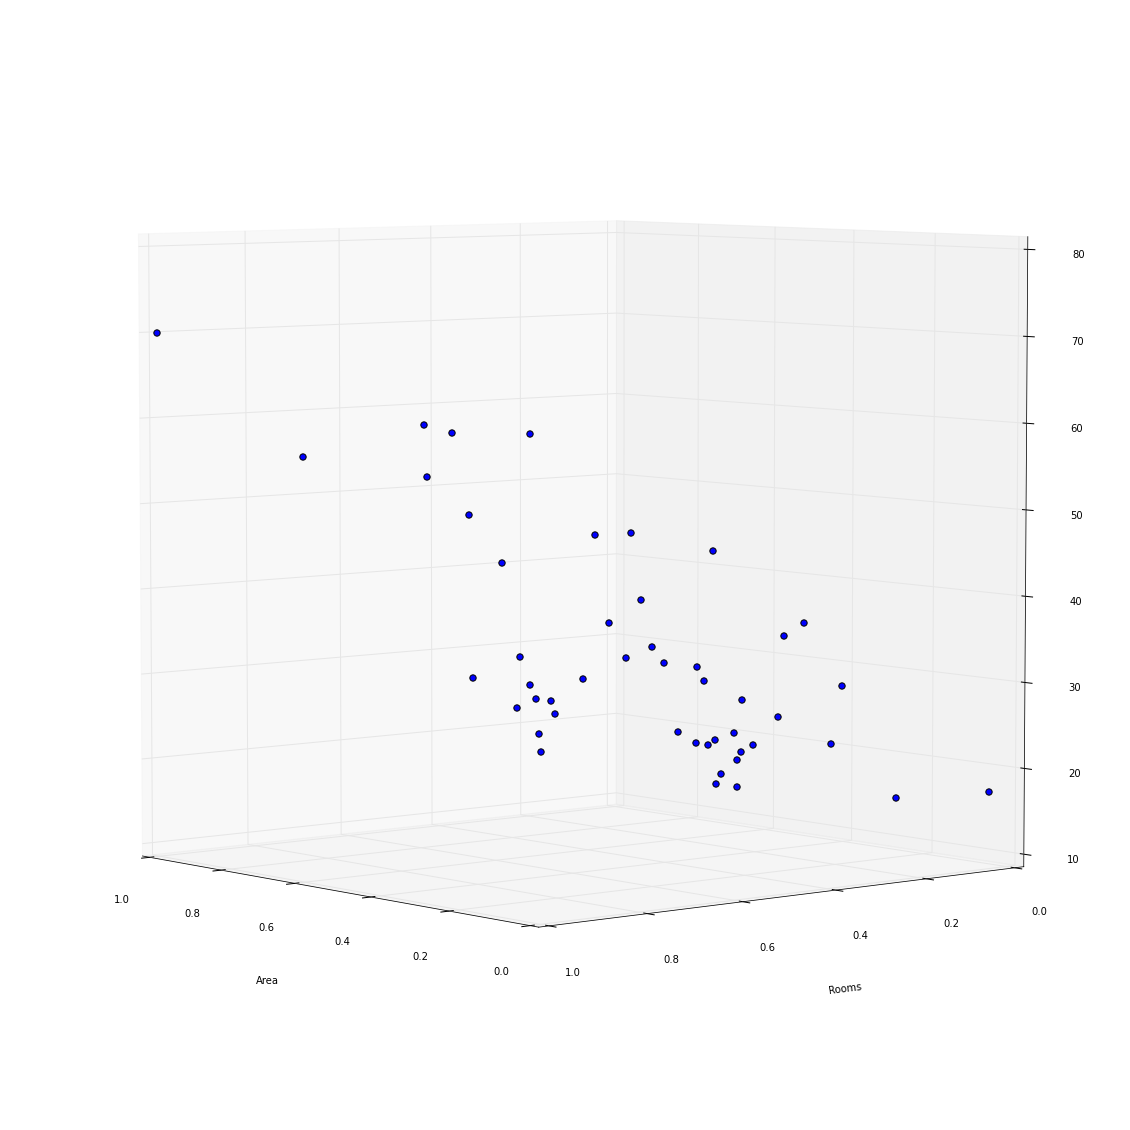

In [24]:
show(x_scaled, y_scaled, 5.0, 140)

In [25]:
from sklearn.cross_validation import KFold
def kf_cross_validation(xs, ys, optimization_method, minimize_f, n_fold=10, **params):
    kf = KFold(len(xs), n_fold, True)
    kf_sum = 0
    dim = len(xs[0])
    for train_i, test_i in kf:
        w = optimization_method(minimize_f(xs, ys), dim, **params)
        error = minimize_f(xs[test_i], ys[test_i])(w)
        if hasattr(error, '__iter__'):
            kf_sum += error[0]
        else:
            kf_sum += error
    return kf_sum/n_fold

In [26]:
def mse(predicted, label):
    return ((predicted - label) ** 2).sum() / len(predicted)

In [28]:
from GeneticOptimization import GeneticOptimization
xs_scaled = MinMaxScaler().fit_transform(xs)
ys_scaled = MinMaxScaler().fit_transform(ys)
xs_appended = np.apply_along_axis(lambda x: np.append(x, 1), 1, xs_scaled)

minimize_f = lambda X, Y: lambda w: mse(np.apply_along_axis(lambda x: np.dot(w, x), 1, X), Y)
ga = GeneticOptimization()
kf_cross_validation(xs_appended, ys_scaled, ga.fit, minimize_f, n_fold=2)

/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


0.01479641379987932